In [1]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MinuteLocator, SecondLocator
import numpy as np
# from StringIO import StringIO
import datetime as dt
import yaml, glob

In [8]:

def parse_ivals(bench: str, build: str):
    files = glob.glob(f'/home/wenyuz/MMTk-Dev/evaluation/results/log/ix-worker-yield-boar-2024-03-05-Tue-141643/{bench}.*.{build}.*.log')
    print(files)
    if len(files) == 0: return None
    with open(files[0], 'r') as f:
        yaml_src, recording, parsing_finished = "", False, False
        for line in f:
            if line.startswith('===== GC Intervals Start ====='):
                recording = True
            elif line.startswith('===== GC Intervals End ====='):
                recording = False
                parsing_finished = True
            elif recording:
                yaml_src += line
        return yaml.safe_load(yaml_src) if parsing_finished else None

def calculate_work_ivals(stw_ivals, work_ivals):
    ivals = []
    for [x1, x2] in work_ivals:
        overlap = False
        for [y1, y2] in stw_ivals:
            if x1 <= y2 and y1 <= x2:
                overlap = True
                break
        if overlap:
            ivals.append([x1, x2])
    print(ivals)
    starts = [float(x[0]) / 1000.0 for x in ivals]
    stops = [float(x[1]) / 1000.0 for x in ivals]
    return starts, stops

def plot_timeline(bench: str, build: str, pauses=None, skip=0):
    data = parse_ivals(bench, build)
    if data is None: return
    if len(data['stw-tracing']) <= 0: return
    plt.figure(figsize=(20,6))
    stw = data['stw-tracing']
    if pauses is None: pauses = len(stw)
    stw = stw[skip : skip+pauses]
    data['stw-tracing'] = stw
    n = len(data['busy'])
    # plot work ivals
    print(data['stw-tracing'])
    for i in range(n):
        starts, stops = calculate_work_ivals(data['stw-tracing'], data['busy'][i])
        y = np.ones(len(starts)) * i
        # timelines(y, starts, stops, 'k')
        plt.hlines(y, starts, stops, 'k', lw=4)
    # plot stw phases
    for [start, stop] in data['stw-tracing']:
        plt.vlines([start/1000.0], [-0.5], [n+0.5], 'r', lw=1)
        plt.vlines([stop/1000.0], [-0.5], [n+0.5], 'b', lw=1)

Immix, 3x heap

['/home/wenyuz/MMTk-Dev/evaluation/results/log/ix-worker-yield-boar-2024-03-05-Tue-141643/cassandra.3000.321.jdk-mmtk.ix.common3.ms.tph.dacapochopin.log']
[[64915351, 64929842]]
[[64915371, 64925119], [64925129, 64925137], [64925146, 64925147], [64925151, 64925315], [64925326, 64925327], [64925347, 64925348], [64925415, 64925416], [64925442, 64925442], [64925454, 64925456], [64925474, 64925475], [64925504, 64925505], [64925546, 64925547], [64925592, 64925593], [64925607, 64925607], [64925644, 64925646], [64925718, 64926852], [64926866, 64927002], [64927034, 64927036], [64927091, 64927092], [64927115, 64927116], [64927119, 64927120], [64927147, 64927148], [64927217, 64927220], [64927262, 64927263], [64927307, 64927307], [64927404, 64927405], [64927468, 64927468], [64927524, 64927525], [64927566, 64927569], [64927609, 64927924], [64928015, 64928018], [64928097, 64928097], [64928191, 64928192], [64928393, 64928394], [64928598, 64928599], [64929034, 64929035], [64929161, 64929164], [649298

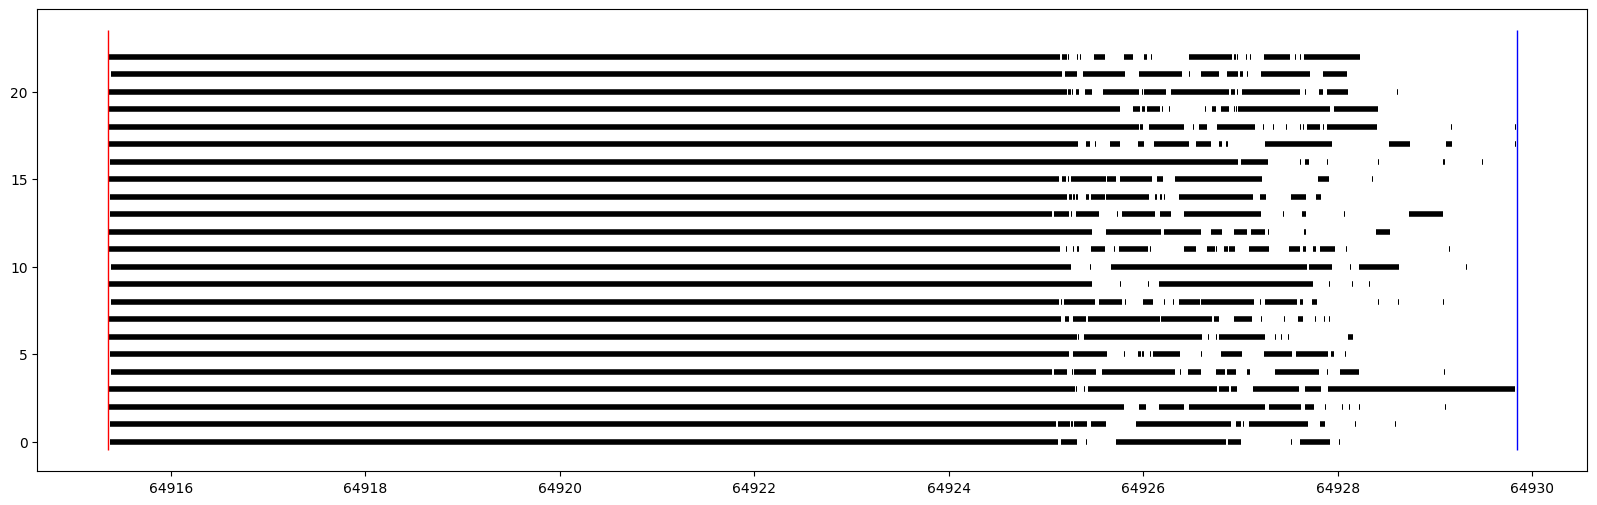

In [9]:
plot_timeline("cassandra", "jdk-mmtk", pauses=1, skip=1)

['/home/wenyuz/MMTk-Dev/evaluation/results/log/ix-worker-yield-boar-2024-03-05-Tue-141643/cassandra.3000.321.jdk-mmtk-opt.ix.common3.ms.tph.dacapochopin.log']
[[65119515, 65131037]]
[[65119561, 65126569], [65126580, 65129819], [65129820, 65129821], [65129828, 65129993], [65130002, 65130105], [65130118, 65130180], [65130192, 65130496], [65130505, 65130509], [65130543, 65130545], [65130568, 65130625], [65130645, 65130685], [65130693, 65130852], [65130917, 65130918], [65130949, 65130990], [65131012, 65131015]]
[[65119538, 65127558], [65127566, 65129312], [65129329, 65130028], [65130065, 65130066], [65130098, 65130106], [65130125, 65130127], [65130175, 65130179], [65130185, 65130186], [65130248, 65130251], [65130333, 65130337], [65130355, 65130377], [65130414, 65130433], [65130461, 65130462], [65130471, 65130481], [65130488, 65130497], [65130537, 65130626], [65130646, 65130725], [65130731, 65130869], [65130891, 65130892], [65130899, 65130900], [65130915, 65130916], [65130938, 65130939], [6

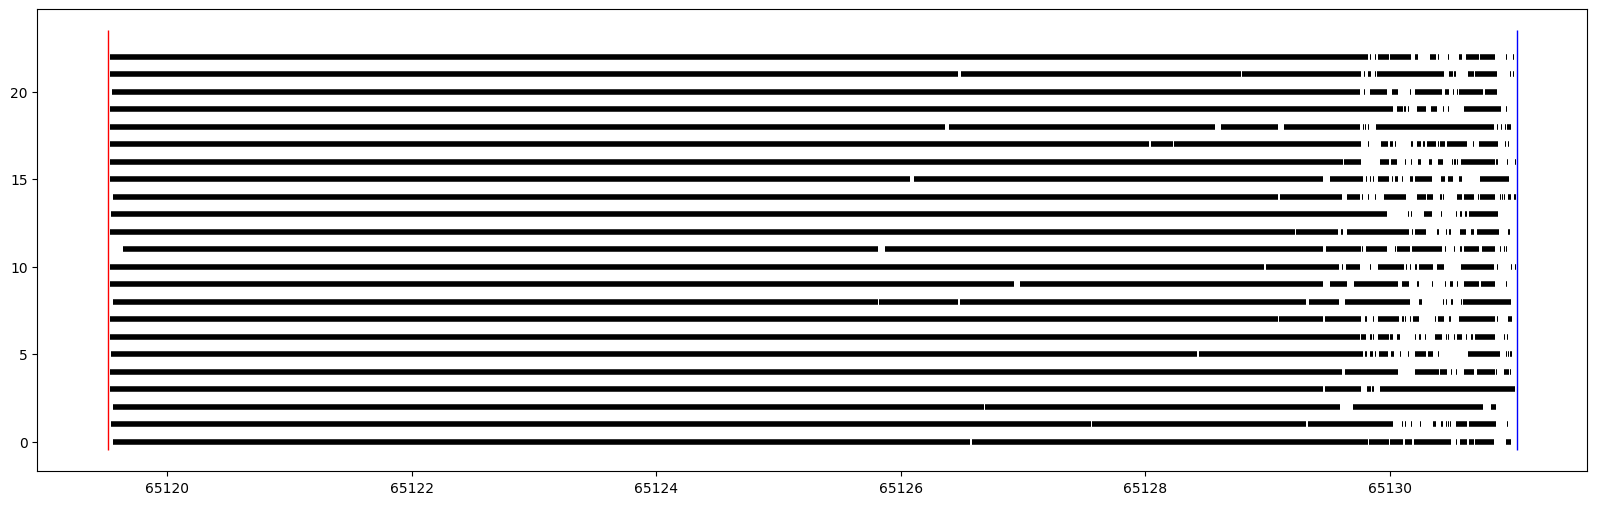

In [10]:
plot_timeline("cassandra", "jdk-mmtk-opt", pauses=1, skip=1)